In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tqdm import tqdm
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica Neue"],
    "font.size": 28})

np.random.seed(0)

In [ ]:
# Generate timings and iterations
n_plot = []
t_plot = []
iter_plot = []

n_max = 900
n_vec = np.arange(10, n_max + 1, 10, dtype=int)

for n in tqdm(n_vec):
    m = n * 3

    v = np.random.randn(n)
    A = np.random.randn(m, n)
    delta = np.random.rand(m)
    b = A @ v + delta
    c = np.random.randn(n)

    x = cp.Variable(n)
    problem = cp.Problem(cp.Minimize(c @ x), [A @ x <= b])
    problem.solve(solver=cp.CLARABEL)
    if problem.status != 'optimal':
        print("error not optimal!")

    n_plot.append(n)
    t_plot.append(problem.solver_stats.solve_time)
    iter_plot.append(problem.solver_stats.num_iters)

In [12]:
def func_iter(x, a):
    return a * np.log(x)

def func_time(x, a):
    return a * x**3 * np.log(x)

popt_iter, pcov = curve_fit(func_iter, n_plot, iter_plot, bounds=(0, [20]))
y_iter = func_iter(np.array(n_plot), *popt_iter)

popt_time, pcov = curve_fit(func_time, n_plot, t_plot, bounds=(0, [20]))
y_time = func_time(np.array(n_plot), *popt_time)

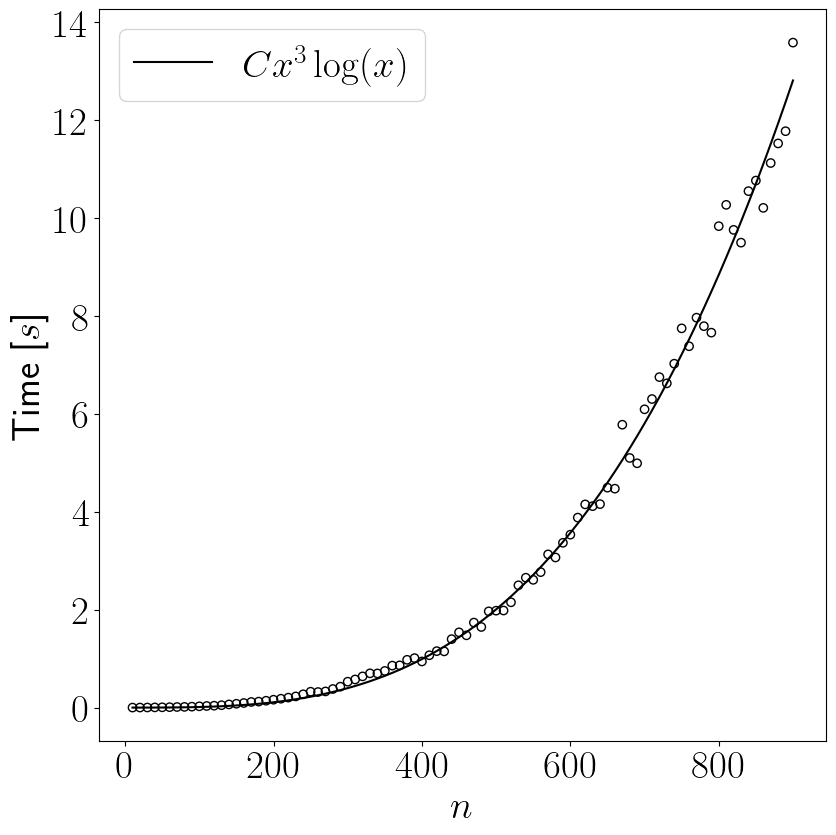

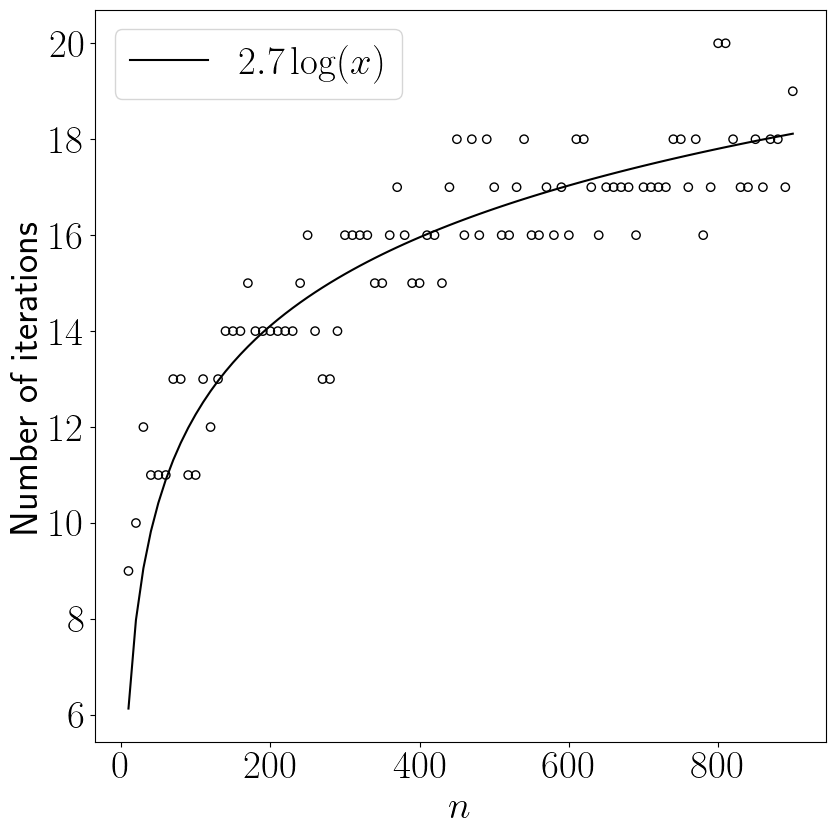

In [13]:
fig, axs = plt.subplots(1, 1, figsize=(9, 9), tight_layout=True)
axs.scatter(n_plot, t_plot, marker='o', color='k', facecolors='none')
axs.plot(n_plot, y_time, 'k-', label=r'$C x^3 \log(x)$')
axs.legend()
axs.set_xlabel(r'$n$')
axs.set_ylabel(r'Time [$s$]')
plt.savefig("average_interior_point_time.pdf")


fig, axs = plt.subplots(1, 1, figsize=(9, 9), tight_layout=True)
axs.scatter(n_plot, iter_plot, marker='o', color='k', facecolors='none')
axs.plot(n_plot, y_iter, 'k-', label=r'$%1.1f \log(x)$' % tuple(popt_iter))
axs.legend()
axs.set_xlabel(r'$n$')
axs.set_ylabel(r'Number of iterations')
plt.savefig("average_interior_point_iter.pdf")